In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [2]:
#import CSV file
red_df = pd.read_csv('../Resources/Data/winequality-red.csv', delimiter=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# drop duplicate data
red_df = red_df.drop_duplicates(keep = 'first', inplace = False)
red_df = red_df.dropna(axis = 'columns', how='all')
red_df = red_df.reset_index(drop = True)
#red_df

In [4]:
red_stats = red_df.describe()
red_stats.drop(["count"], axis=0, inplace=True)
red_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [5]:
#datatype 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [6]:
# check for null values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red_df.shape

(1359, 12)

In [8]:
red_df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [9]:
# Features for Quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
red_df['quality'] = pd.cut(red_df['quality'], bins, labels = group_names)

In [10]:
X = red_df.drop("quality", axis =1)
y = red_df["quality"]

In [11]:
red_df['quality'].value_counts()

Fair         1175
Very Good     184
Name: quality, dtype: int64

[0.07760434 0.09689165 0.09522387 0.07641884 0.06964295 0.06917434
 0.08089227 0.08268616 0.06691808 0.1142985  0.170249  ]


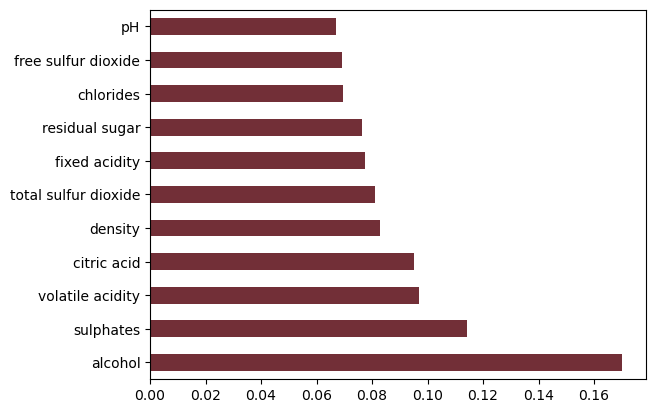

In [12]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(11).plot(kind= "barh" , color = "#722F37")
#plt.savefig('../Resources/images/red_features_importance_top5.jpg',bbox_inches="tight")
#plt.savefig('../Resources/images/red_features_importance.jpg',bbox_inches="tight")
plt.show()

In [13]:
feat_importances.sort_values(ascending=False)

alcohol                 0.170249
sulphates               0.114299
volatile acidity        0.096892
citric acid             0.095224
density                 0.082686
total sulfur dioxide    0.080892
fixed acidity           0.077604
residual sugar          0.076419
chlorides               0.069643
free sulfur dioxide     0.069174
pH                      0.066918
dtype: float64

# Create a Train Test Split 

## All Features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets

from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(X,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

# Pre-pocessing 

In [ ]:
# Scale the data using the StandardScaler 
X_scale = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=11))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))


In [ ]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
#deep_model.get_config()

In [ ]:
# fit model
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

# Quantify our Trained Model

In [ ]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

# Make Predictions

In [ ]:
#encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=1)
#prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
#print(f"Predicted classes: {prediction_labels}")
#print(f"Actual Labels: {list(y_test[:5])}")

In [ ]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = y_pred.round()

print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
# classification report 

target_names = ['Fair', 'Very Good']                    
print(classification_report(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

## Results - All Features

In [ ]:
# Plot Confusion Matrix - all features

label_aux = plt.subplot()
cm_dl_red = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (All Features)')
#plt.savefig('../Resources/images/dl_red_cm_nor_all.jpg');
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr , tpr , thresholds = roc_curve(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))

plt.title('ROC (All Features - Red Wine)')

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
    
  
plot_roc_curve (fpr,tpr) 
#plt.savefig('../Resources/images/dl_red_auc_all.jpg')
plt.show()

In [ ]:
#AUC score 
auc_score=roc_auc_score(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
auc_score

In [ ]:
# Plot Loss during training - all features
from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_red_loss_all.jpg')
plt.show()

In [ ]:
# plot accuracy during training
from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_red_accuracy_all.jpg')
pyplot.show()

# Save the Model

In [ ]:
# Save the Model (test all features, selected features)

#filename = '../Resources/results/dl_red_all.h5'

# Create a Train Test Split 
## Top 5 Features

In [14]:
# Selected important features - top 5
selected_features = X[['alcohol', 'density','free sulfur dioxide','residual sugar','pH']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [16]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((951, 5), (285, 5), (123, 5), (951,), (285,), (123,))

# Pre-pocessing 

In [17]:
# Scale the data using the StandardScaler and perform some feature selection
X_scale = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [19]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(951, 5) (123, 5) (951,)


In [20]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=20, activation='relu', input_dim=5))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=2, activation='sigmoid'))

In [24]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit model

history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Epoch 1/30
24/24 - 1s - loss: 0.7711 - accuracy: 0.5316 - val_loss: 0.6419 - val_accuracy: 0.7330
Epoch 2/30
24/24 - 0s - loss: 0.5858 - accuracy: 0.7382 - val_loss: 0.5339 - val_accuracy: 0.8010
Epoch 3/30
24/24 - 0s - loss: 0.4937 - accuracy: 0.8329 - val_loss: 0.4732 - val_accuracy: 0.8377
Epoch 4/30
24/24 - 0s - loss: 0.4402 - accuracy: 0.8605 - val_loss: 0.4337 - val_accuracy: 0.8586
Epoch 5/30
24/24 - 0s - loss: 0.4070 - accuracy: 0.8618 - val_loss: 0.4076 - val_accuracy: 0.8691
Epoch 6/30
24/24 - 0s - loss: 0.3829 - accuracy: 0.8645 - val_loss: 0.3882 - val_accuracy: 0.8691
Epoch 7/30
24/24 - 0s - loss: 0.3655 - accuracy: 0.8645 - val_loss: 0.3711 - val_accuracy: 0.8691
Epoch 8/30
24/24 - 0s - loss: 0.3520 - accuracy: 0.8645 - val_loss: 0.3564 - val_accuracy: 0.8691
Epoch 9/30
24/24 - 0s - loss: 0.3400 - accuracy: 0.8645 - val_loss: 0.3451 - val_accuracy: 0.8691
Epoch 10/30
24/24 - 0s - loss: 0.3311 - accuracy: 0.8645 - val_loss: 0.3352 - val_accuracy: 0.8691
Epoch 11/30
24/24 -

# Quantify our Trained Model

In [27]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

4/4 - 0s - loss: 0.3213 - accuracy: 0.8862
Normal Neural Network - Loss: 0.3213039040565491, Accuracy: 0.8861788511276245


# Make Predictions

In [28]:
#encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [29]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Fair' 'Fair' 'Fair' 'Fair' 'Fair']
Actual Labels: ['Fair', 'Fair', 'Very Good', 'Fair', 'Fair']


In [30]:
y_pred = deep_model.predict(X_test_scaled)
y_pred[:5], y_test_categorical[:5]

(array([[0.8697345 , 0.06556925],
        [0.8669776 , 0.03773981],
        [0.65854514, 0.26407304],
        [0.8506533 , 0.07412058],
        [0.85690594, 0.09456915]], dtype=float32),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]], dtype=float32))

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = y_pred.round()

# Confusion matrix
print(confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1)))

[[107   1]
 [ 13   2]]


In [32]:
# classification report 

target_names = ['Fair', 'Very Good']                    
print(classification_report(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

        Fair       0.89      0.99      0.94       108
   Very Good       0.67      0.13      0.22        15

    accuracy                           0.89       123
   macro avg       0.78      0.56      0.58       123
weighted avg       0.86      0.89      0.85       123



## Results 

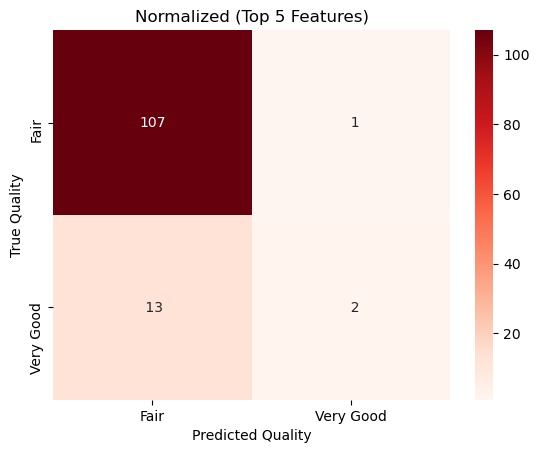

In [33]:
# Plot Confusion Matrix - Top 5 Features

label_aux = plt.subplot()
cm_dl_red = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
cm_dl = pd.DataFrame(cm_dl_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_dl,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (Top 5 Features)')
#plt.savefig('../Resources/images/dl_red_cm_nor_selected.jpg');
plt.show()

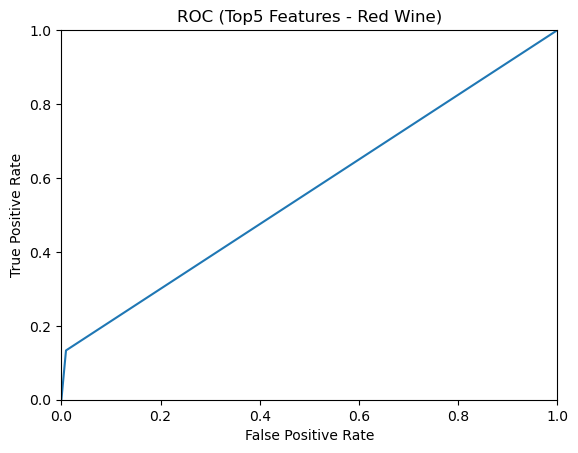

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr , tpr , thresholds = roc_curve(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))

plt.title('ROC (Top5 Features - Red Wine)')

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
    
  
plot_roc_curve (fpr,tpr) 
#plt.savefig('../Resources/images/dl_red_auc_top5.jpg')
plt.show()

In [36]:
#AUC score
auc_score=roc_auc_score(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
auc_score

0.562037037037037

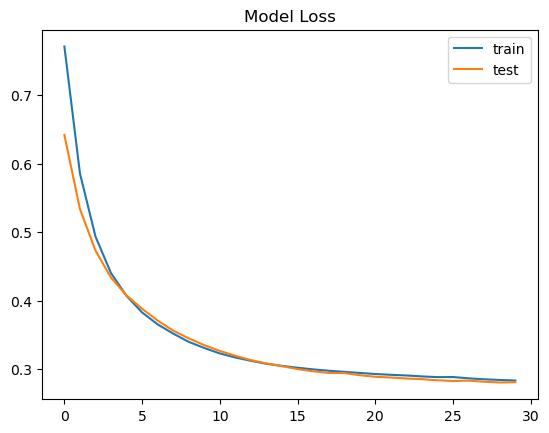

In [39]:
# Plot Loss during training - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('../Resources/images/dl_red_loss_selected.jpg')
plt.show()

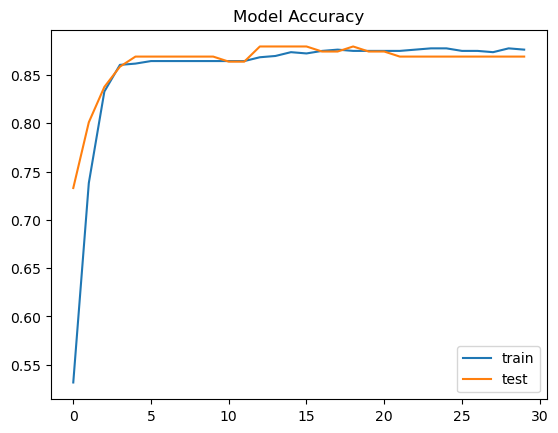

In [40]:
# Plot Loss during Accuracy - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
#plt.savefig('../Resources/images/dl_red_accuracy_selected.jpg')
pyplot.show()

# Save the Model

In [ ]:
# Save the Model (test all features, selected features)
#filename = '../Resources/results/dl_red_selected.h5'